**Problem Statement : `Classify the Credit Score`**

**You are working as a data scientist in a global finance company. Over the years, the company has basic and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.**

**Task**

**Given a person's credit-related information, build a machine learning model that can classify the credit score.**

**Data Description**

|Column Name|Description|
|----:|:-------|
|ID|Represents a unique identification of an entry|
|Customer_ID|Represents a unique identification of a person|
|Month|Represents the month of the year|
|Name|Represents the name of the person|
|Age|Represents the age of the person|
|SSN|Represents the social security number of a person|
|Occupation|Represents the occupation of the person|
|Annual_Income|Represents the annual income of the person|
|Monthly_Base_Salary|Represents the monthly base salary of a person|
|Num_Bank_Accounts|Represents the number of bank accounts a person holds|
|Num_Credit_Card|Represents the number of other credit cards held by a person|
|Interest_Rate|Represents the interest rate on credit card|
|Num_of_Loan|Represents the number of loans taken from the bank|
|Type_of_Loan|Represents the types of loan taken by a person|
|Delay_from_due_date|Represents the average number of days delayed from the payments date|
|Num_of_delayed_payment|Represents the average number of payments delayed by person|
|Changed_Credit_Limit|Represents the percentage change in credit card limit|
|Num_Credit_Inquiries|Represents the number of credit card inquires|
|Credit_Mix|Represents the classification of the mix of credits|
|Outstanding_Debt|Represents the remaining dept to be paid (in USD)|
|Credit_Utilization_Ratio|Represents the utilization ratio of credit card|
|Credit_History_Age|Represents the age of credit history of the person|
|Payment_of_Min_Amount|Represents whether only the minimum amount was paid by the person|
|Total_EMI_per_month|Represents the monthly EMI payments (in USD)|
|Amount_invested_monthly|Represents the monthly amount invested by the customer (in USD)|
|Payment_Behavior|Represents the payment behavior of the customer (in USD)|
|Monthly_Balance|Represents the monthly balance amount of the customer (in USD)|
|Credit_Score|Represents the bracket of credit score (Poor, Standard, Good)|

## Data import...

**Import necessary libraries...**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

**Load Data from train and test...**

In [2]:
df_train = pd.read_csv('train.csv', low_memory=False)

In [3]:
df_test = pd.read_csv('test.csv')

**Check all data information...**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**View dataframe...**

In [5]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Wrangling...

**Check number of null value are present in train data...**

In [6]:
df_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

#### `ID` :	_Represents a unique identification of an entry_

In [7]:
# Check number of unique row's match with length of dataframe
df_train['ID'].nunique() == len(df_train)

True

#### `Customer_ID` :	_Represents a unique identification of a person_

In [8]:
# Check how many customers are presents ?
df_train['Customer_ID'].nunique()

12500

#### `Month` :	_Represents the month of the year_

#### `Name` :	_Represents the name of the person_

#### `Age` :	_Represents the age of the person_

#### `SSN` :	_Represents the social security number of a person_

#### `Occupation` :	_Represents the occupation of the person_

In [9]:
# how many different Occupation are presents ?
df_train['Occupation'].nunique()

16

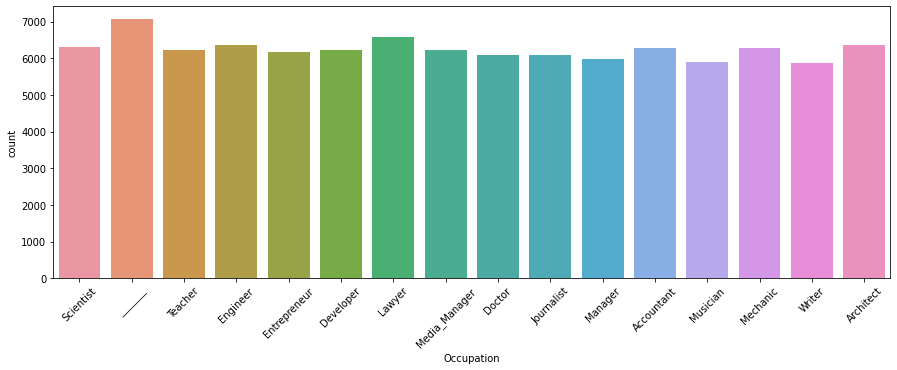

In [10]:
# Plot barchart for each occupation 
plt.figure(figsize=(15, 5))
sns.countplot(x=df_train['Occupation'])
plt.xticks(rotation=45);

#### `Annual_Income` :	_Represents the annual income of the person_

In [11]:
# Convert `annual_income` into "flot64" datatype
import re
df_train['Annual_Income'] = [re.search(r'\d+.\d+', x)[0] for x in df_train['Annual_Income']]
df_train['Annual_Income'] = df_train['Annual_Income'].astype('float64')

In [12]:
# Check each occupation average annual income
df_train.groupby('Occupation')['Annual_Income', 'Monthly_Inhand_Salary'].mean()

C:\Users\home_\AppData\Local\Temp/ipykernel_1480/7698367.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('Occupation')['Annual_Income', 'Monthly_Inhand_Salary'].mean()


,Annual_Income,Monthly_Inhand_Salary
Occupation,,
Accountant,198570.933803,4222.727370
Architect,168015.546481,4284.783856
Developer,168694.593065,4144.332256
Doctor,191925.357637,4108.940425
Engineer,173880.853179,4252.244204
Entrepreneur,183451.049345,4235.833881
Journalist,157595.260546,4001.473736
Lawyer,196039.874458,4135.320552
Manager,159213.683160,4274.944070


Text(0, 0.5, 'Average "Annual_Income"')

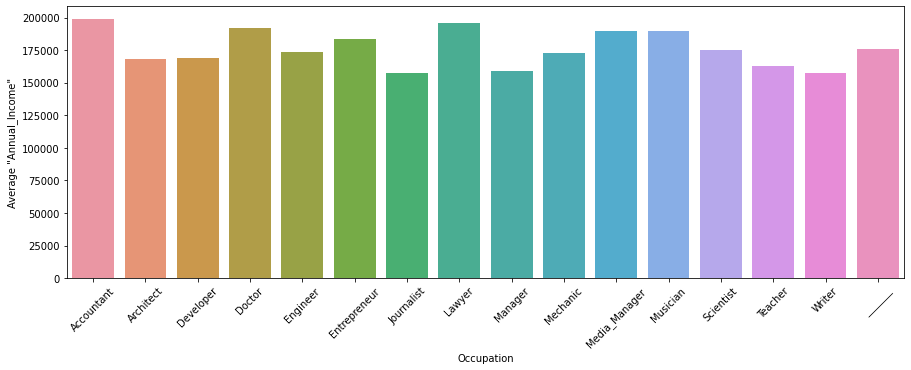

In [13]:
# plot bargraph average income by occupation
plt.figure(figsize=(15, 5))
sns.barplot(y=df_train.groupby('Occupation')['Annual_Income'].mean().values,
            x=df_train.groupby('Occupation')['Annual_Income'].mean().index)
plt.xticks(rotation=45);
plt.ylabel('Average "Annual_Income"')

#### `Monthly_Base_Salary` :	_Represents the monthly base salary of a person_

In [14]:
# fill null value by 'ffill' method (it is fill by last valid observation forward to next valid)
df_train['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)

In [15]:
# summarize annual and monthly income
df_train[['Annual_Income', 'Monthly_Inhand_Salary']].describe()

,Annual_Income,Monthly_Inhand_Salary
count,1.000000e+05,100000.000000
mean,1.764157e+05,4196.144246
std,1.429618e+06,3187.848468
min,7.005930e+03,303.645417
25%,1.945750e+04,1625.558333
50%,3.757861e+04,3089.544583
75%,7.279092e+04,5957.715000
max,2.419806e+07,15204.633333


<AxesSubplot:xlabel='Annual_Income'>

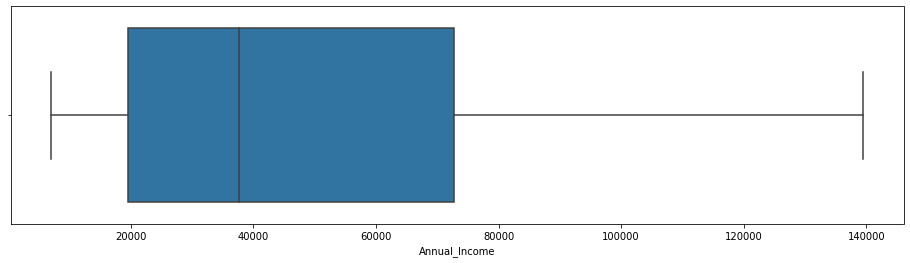

In [242]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Annual_Income']))

In [243]:
df_train['Annual_Income'] = iqr_method_outliers(column=df_train['Annual_Income'])

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

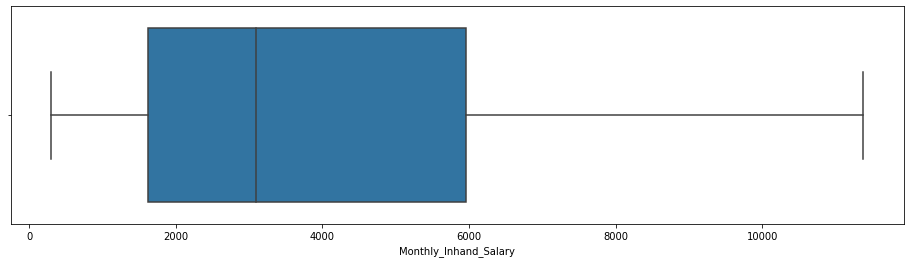

In [244]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Monthly_Inhand_Salary']))

In [245]:
df_train['Monthly_Inhand_Salary'] = iqr_method_outliers(column=df_train['Monthly_Inhand_Salary'])

#### `Num_Bank_Accounts` :	_Represents the number of bank accounts a person holds_

In [16]:
# Check how many different accounts present ? 
df_train['Num_Bank_Accounts'].nunique()

943

In [17]:
# Summarize
df_train['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Bank_Accounts'>

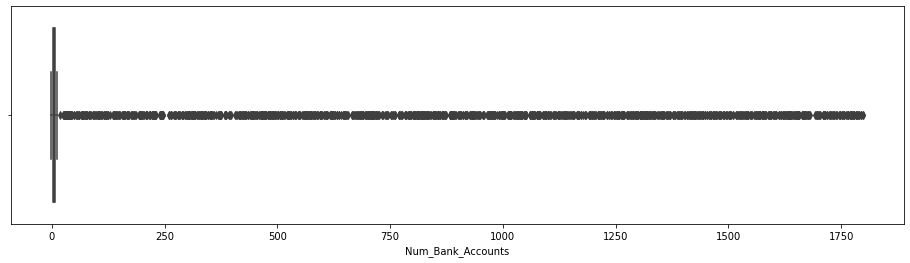

In [18]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Num_Bank_Accounts'])

In [197]:
def iqr_method_outliers(column):
    data_ = column
    q1 = data_.quantile(.25)
    q3 = data_.quantile(.75)
    iqr = q3-q1
    lower_bound = q1 - 1.25*iqr
    upper_bound = q3 + 1.25*iqr
    return data_.clip(lower=lower_bound, upper=upper_bound, axis=0)

In [199]:
iqr_method_outliers(column=df_train['Num_Bank_Accounts'])

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    4.0
99996    4.0
99997    4.0
99998    4.0
99999    4.0
Name: Num_Bank_Accounts, Length: 100000, dtype: float64

<AxesSubplot:xlabel='Num_Bank_Accounts'>

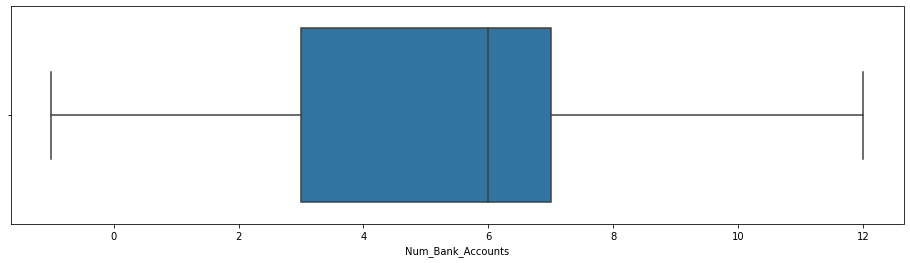

In [200]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Num_Bank_Accounts']))

In [201]:
df_train['Num_Bank_Accounts'] = iqr_method_outliers(column=df_train['Num_Bank_Accounts'])

#### `Num_Credit_Card` :	_Represents the number of other credit cards held by a person_

In [19]:
df_train['Num_Credit_Card'].nunique()

1179

In [20]:
df_train['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Card'>

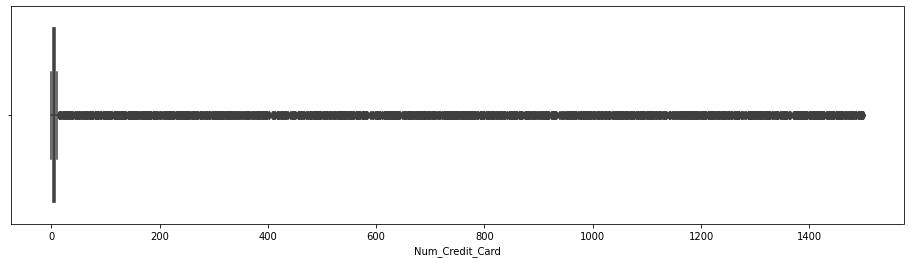

In [21]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Num_Credit_Card'])

<AxesSubplot:xlabel='Num_Credit_Card'>

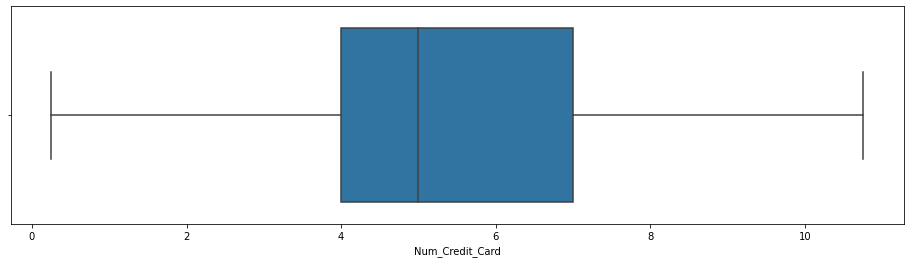

In [202]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Num_Credit_Card']))

In [203]:
df_train['Num_Credit_Card'] = iqr_method_outliers(column=df_train['Num_Credit_Card'])

In [22]:
df_train[['Num_Bank_Accounts','Num_Credit_Card']].describe()

,Num_Bank_Accounts,Num_Credit_Card
count,100000.000000,100000.00000
mean,17.091280,22.47443
std,117.404834,129.05741
min,-1.000000,0.00000
25%,3.000000,4.00000
50%,6.000000,5.00000
75%,7.000000,7.00000
max,1798.000000,1499.00000


#### `Interest_Rate` :	_Represents the interest rate on credit card_

In [23]:
df_train['Interest_Rate'].nunique()

1750

In [24]:
df_train['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

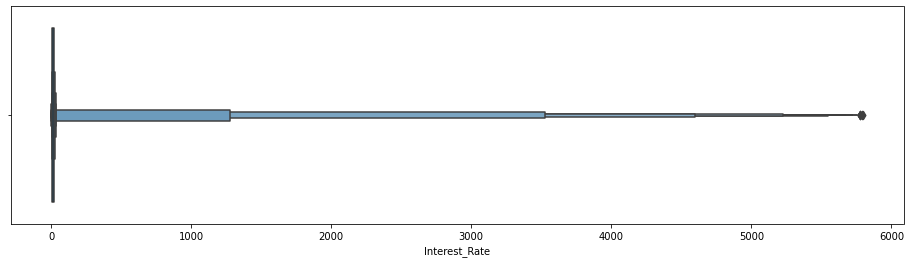

In [25]:
plt.figure(figsize=(16,4))
sns.boxenplot(df_train['Interest_Rate'])

<AxesSubplot:xlabel='Interest_Rate'>

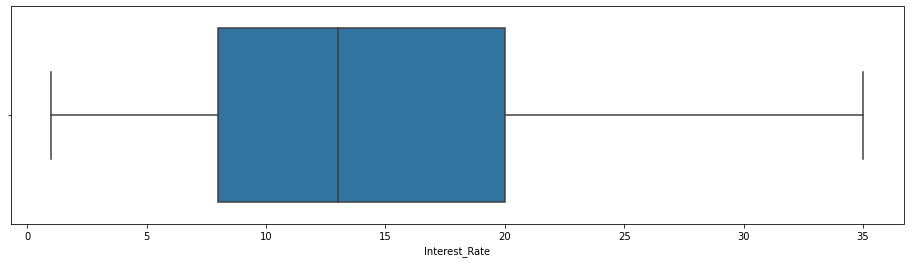

In [204]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Interest_Rate']))

In [205]:
df_train['Interest_Rate'] = iqr_method_outliers(column=df_train['Interest_Rate'])

#### `Num_of_Loan` :	_Represents the number of loans taken from the bank_

In [26]:
df_train['Num_of_Loan'] = [int(re.search(r'-\d*|\d*', x)[0]) for x in df_train['Num_of_Loan']]

In [27]:
df_train['Num_of_Loan']

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 100000, dtype: int64

In [28]:
df_train['Num_of_Loan'].nunique()

414

In [29]:
df_train['Num_of_Loan'].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

<AxesSubplot:xlabel='Num_of_Loan'>

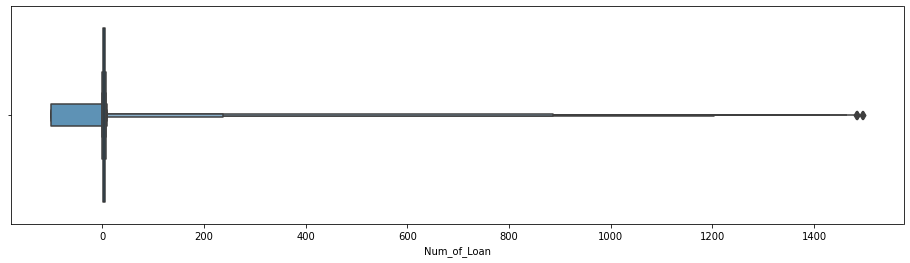

In [30]:
plt.figure(figsize=(16,4))
sns.boxenplot(x=df_train['Num_of_Loan'])

<AxesSubplot:xlabel='Num_of_Loan'>

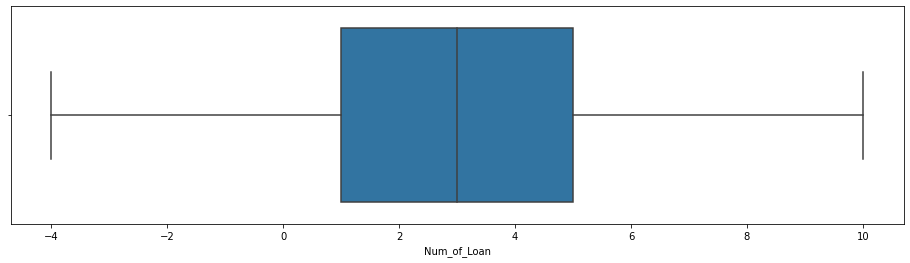

In [206]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Num_of_Loan']))

In [207]:
df_train['Num_of_Loan'] = iqr_method_outliers(column=df_train['Num_of_Loan'])

#### `Type_of_Loan` :	_Represents the types of loan taken by a person_

In [31]:
df_train['Type_of_Loan'].nunique()

6260

In [32]:
df_train['Type_of_Loan'].describe()

count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object

In [33]:
df_train['Type_of_Loan'].isna().sum()

11408

In [34]:
df_train['Type_of_Loan'].value_counts().head(20)

Not Specified                               1408
Credit-Builder Loan                         1280
Personal Loan                               1272
Debt Consolidation Loan                     1264
Student Loan                                1240
Payday Loan                                 1200
Mortgage Loan                               1176
Auto Loan                                   1152
Home Equity Loan                            1136
Personal Loan, and Student Loan              320
Not Specified, and Payday Loan               272
Mortgage Loan, and Home Equity Loan          264
Student Loan, and Payday Loan                256
Credit-Builder Loan, and Not Specified       248
Student Loan, and Credit-Builder Loan        248
Payday Loan, and Auto Loan                   240
Payday Loan, and Debt Consolidation Loan     240
Payday Loan, and Student Loan                232
Personal Loan, and Credit-Builder Loan       232
Mortgage Loan, and Not Specified             232
Name: Type_of_Loan, 

In [35]:
df_train[df_train['Type_of_Loan'].isna()]['Num_of_Loan'].describe()

count    11408.000000
mean         0.121406
std         64.886398
min       -100.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1478.000000
Name: Num_of_Loan, dtype: float64

In [36]:
# If someone no take loan then 'Num of loan' will be '0' or less than '0' so I fill `Type of Loan` as a "NO_LOAN"
for index in df_train[(df_train['Num_of_Loan']<=0)&(df_train['Type_of_Loan'].isna())]['Type_of_Loan'].index:
    df_train.loc[index, 'Type_of_Loan'] = 'No_Loan'

In [37]:
df_train['Type_of_Loan'].isna().sum()

61

In [38]:
df_train[df_train['Type_of_Loan'].isna()]['Num_of_Loan'].describe()

count      61.000000
mean      706.311475
std       473.022182
min        18.000000
25%       288.000000
50%       652.000000
75%      1070.000000
max      1478.000000
Name: Num_of_Loan, dtype: float64

In [39]:
# Then fill other null value in `Type of Loan` by 'Not Specified'
df_train['Type_of_Loan'].fillna(value='Not Specified', inplace=True)

In [40]:
types_loan = [re.split(r', and |, ', str(x)) if ' and ' in str(x) else x for x in df_train['Type_of_Loan']]

#### `Delay_from_due_date` :	_Represents the average number of days delayed from the payments date_

In [41]:
df_train['Delay_from_due_date'].nunique()

73

In [42]:
df_train['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay_from_due_date'>

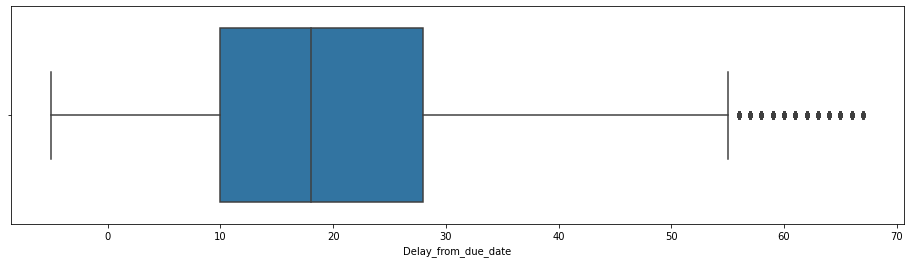

In [43]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Delay_from_due_date'])

<AxesSubplot:xlabel='Delay_from_due_date'>

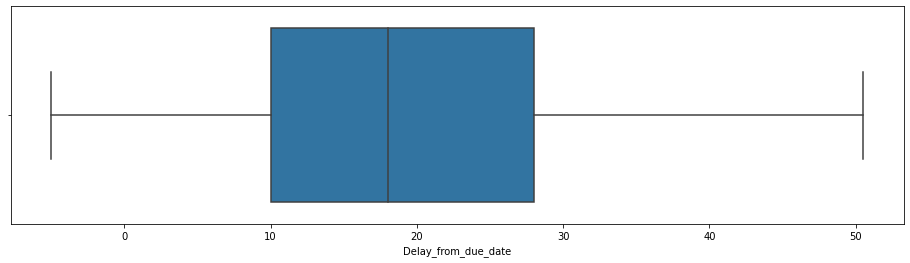

In [208]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Delay_from_due_date']))

In [209]:
df_train['Delay_from_due_date'] = iqr_method_outliers(column=df_train['Delay_from_due_date'])

#### `Num_of_delayed_payment` :	_Represents the average number of payments delayed by person_

In [44]:
df_train['Num_of_Delayed_Payment'].nunique()

749

In [45]:
df_train['Num_of_Delayed_Payment'].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [46]:
df_train['Num_of_Delayed_Payment'] = [int(re.search(r'-\d*|\d*', str(x))[0]) if str(x)!='nan' 
                                      else np.nan for x in df_train['Num_of_Delayed_Payment']]

In [47]:
df_train['Num_of_Delayed_Payment'].isna().sum()

7002

In [48]:
df_train[df_train['Num_of_Delayed_Payment'].isna()]['Delay_from_due_date'].describe()

count    7002.00000
mean       21.12325
std        14.90972
min        -5.00000
25%        10.00000
50%        18.00000
75%        28.00000
max        67.00000
Name: Delay_from_due_date, dtype: float64

In [49]:
# if some one dot delayed their payment so according `Delay from due date` is 0 or negative day
# therefore fill this column by '0'.
for index in df_train[(df_train['Delay_from_due_date']<=0)&
                      (df_train['Num_of_Delayed_Payment'].isna())]['Num_of_Delayed_Payment'].index:
    df_train.loc[index, 'Num_of_Delayed_Payment'] = 0

In [50]:
df_train['Num_of_Delayed_Payment'].isna().sum()

6881

<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Delay_from_due_date'>

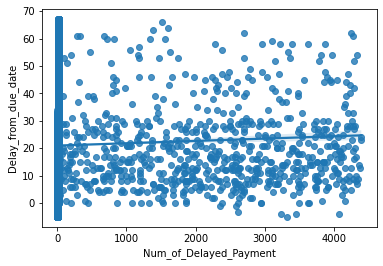

In [51]:
sns.regplot(x=df_train['Num_of_Delayed_Payment'], y=df_train['Delay_from_due_date'])

In [52]:
df_train[['Num_of_Delayed_Payment', 'Delay_from_due_date']].describe()

,Num_of_Delayed_Payment,Delay_from_due_date
count,93119.000000,100000.000000
mean,30.883160,21.068780
std,225.887735,14.860104
min,-3.000000,-5.000000
25%,9.000000,10.000000
50%,14.000000,18.000000
75%,18.000000,28.000000
max,4397.000000,67.000000


In [53]:
# rest of the value fill by median value
df_train['Num_of_Delayed_Payment'].fillna(value=df_train['Num_of_Delayed_Payment'].median(), inplace=True)

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

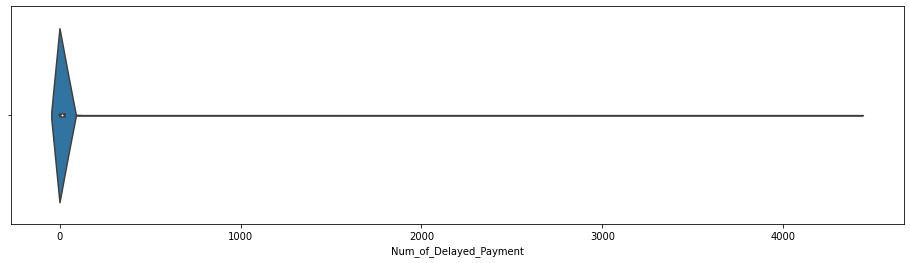

In [54]:
plt.figure(figsize=(16, 4))
sns.violinplot(df_train['Num_of_Delayed_Payment'])

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

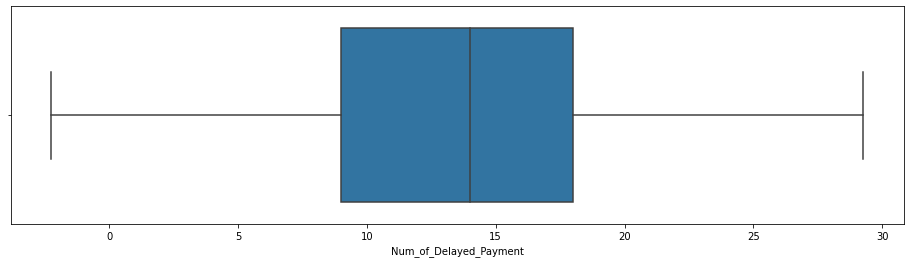

In [210]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Num_of_Delayed_Payment']))

In [211]:
df_train['Num_of_Delayed_Payment'] = iqr_method_outliers(column=df_train['Num_of_Delayed_Payment'])

#### `Changed_Credit_Limit` :	_Represents the percentage change in credit card limit_

In [55]:
df_train['Changed_Credit_Limit'].replace('_', np.nan, inplace=True)

In [56]:
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].astype(float)

In [57]:
df_train['Changed_Credit_Limit'].nunique()

4383

In [58]:
df_train['Changed_Credit_Limit'].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [59]:
df_train['Changed_Credit_Limit'].isna().sum()

2091

In [60]:
# fill null value in this column by mean value
df_train['Changed_Credit_Limit'].fillna(value=df_train['Changed_Credit_Limit'].median(), inplace=True)

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Changed_Credit_Limit'>

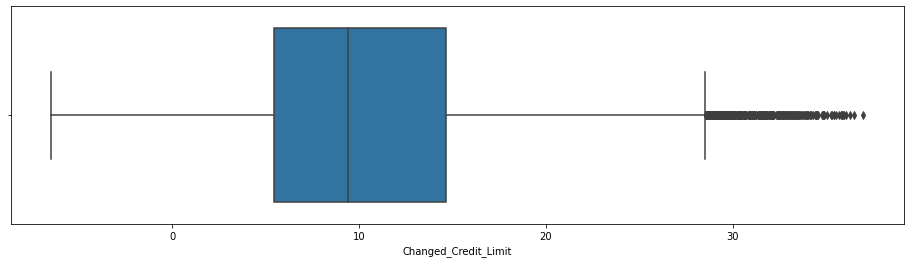

In [61]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Changed_Credit_Limit'])

<AxesSubplot:xlabel='Changed_Credit_Limit'>

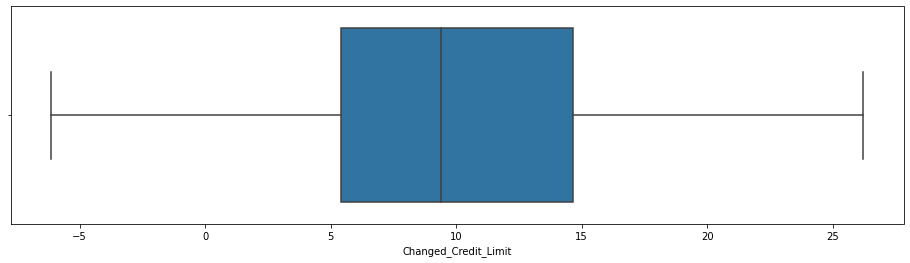

In [212]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Changed_Credit_Limit']))

In [213]:
df_train['Changed_Credit_Limit'] = iqr_method_outliers(column=df_train['Changed_Credit_Limit'])

#### `Num_Credit_Inquiries` :	_Represents the number of credit card inquires_

In [62]:
df_train['Num_Credit_Inquiries'].nunique()

1223

In [63]:
df_train['Num_Credit_Inquiries'].describe()

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [64]:
# Fill this column by median value
df_train['Num_Credit_Inquiries'].fillna(value=df_train['Num_Credit_Inquiries'].median(), inplace=True)

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

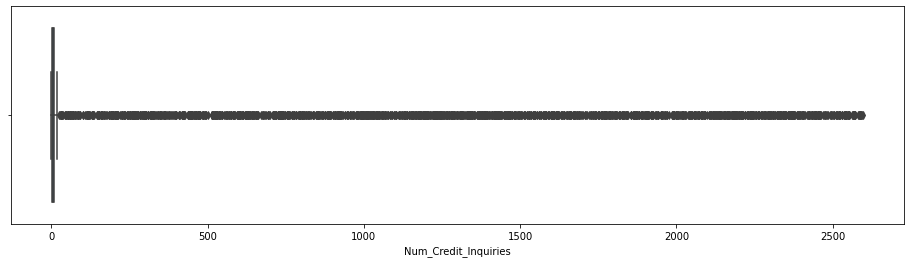

In [65]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Num_Credit_Inquiries'])

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

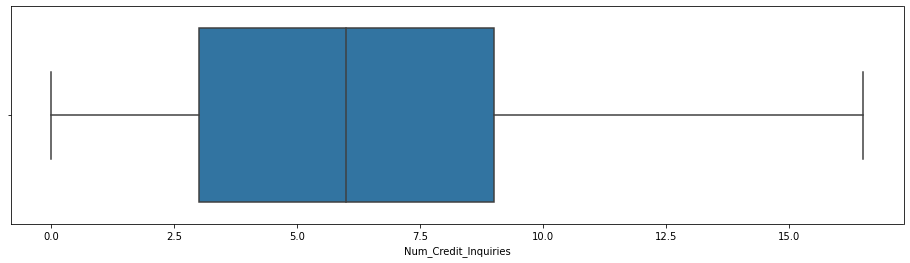

In [214]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Num_Credit_Inquiries']))

In [215]:
df_train['Num_Credit_Inquiries'] = iqr_method_outliers(column=df_train['Num_Credit_Inquiries'])

#### `Credit_Mix` :	_Represents the classification of the mix of credits_

In [66]:
df_train['Credit_Mix'].nunique()

4

In [67]:
df_train['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

#### `Outstanding_Debt` :	_Represents the remaining dept to be paid (in USD)_

In [68]:
df_train['Outstanding_Debt'] = [float(re.search(r'\d*.\d*', str(x))[0]) for x in df_train['Outstanding_Debt']]

In [69]:
df_train['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outstanding_Debt'>

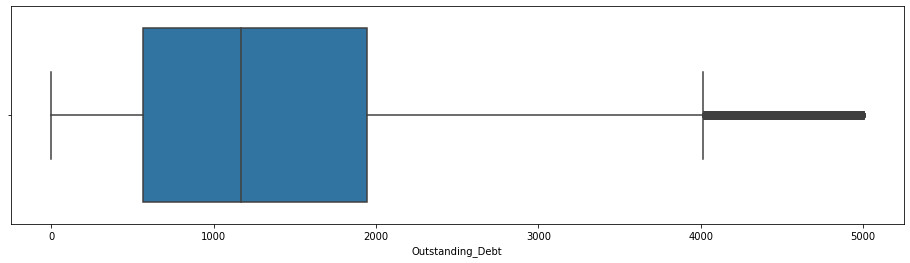

In [70]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Outstanding_Debt'])

<AxesSubplot:xlabel='Outstanding_Debt'>

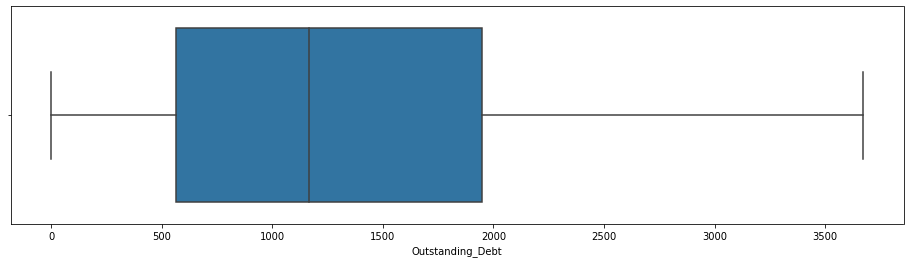

In [216]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Outstanding_Debt']))

In [217]:
df_train['Outstanding_Debt'] = iqr_method_outliers(column=df_train['Outstanding_Debt'])

#### `Credit_Utilization_Ratio` :	_Represents the utilization ratio of credit card_

In [71]:
df_train['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

#### `Credit_History_Age` :	_Represents the age of credit history of the person_

In [72]:
df_train['Credit_History_Age'] = [(int(re.findall(r'[0-9]+', str(x))[0])*12)+int(re.findall(r'[0-9]+', str(x))[1]) 
                                  if str(x)!='nan' else np.nan for x in df_train['Credit_History_Age']]

In [73]:
df_train['Credit_History_Age'].isna().sum()

9030

In [74]:
df_train['Credit_History_Age'].describe()

count    90970.000000
mean       221.195405
std         99.741364
min          1.000000
25%        144.000000
50%        219.000000
75%        302.000000
max        404.000000
Name: Credit_History_Age, dtype: float64

In [75]:
# Fill null value by mean
df_train['Credit_History_Age'].fillna(value=df_train['Credit_History_Age'].median(), inplace=True)

<AxesSubplot:xlabel='Credit_History_Age'>

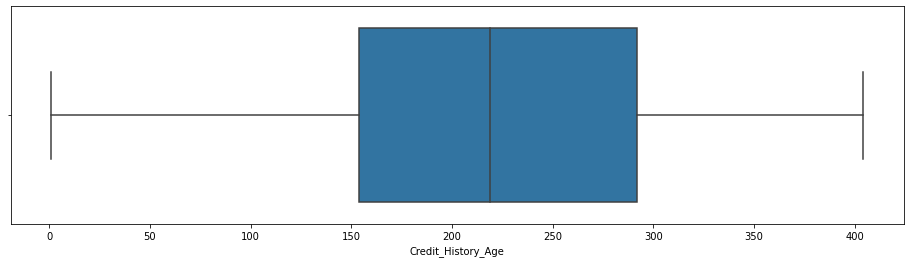

In [218]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=df_train['Credit_History_Age'])

#### `Payment_of_Min_Amount` :	_Represents whether only the minimum amount was paid by the person_

In [76]:
df_train['Payment_of_Min_Amount'].nunique()

3

In [77]:
df_train['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

#### `Total_EMI_per_month` :	_Represents the monthly EMI payments (in USD)_

In [78]:
df_train['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_EMI_per_month'>

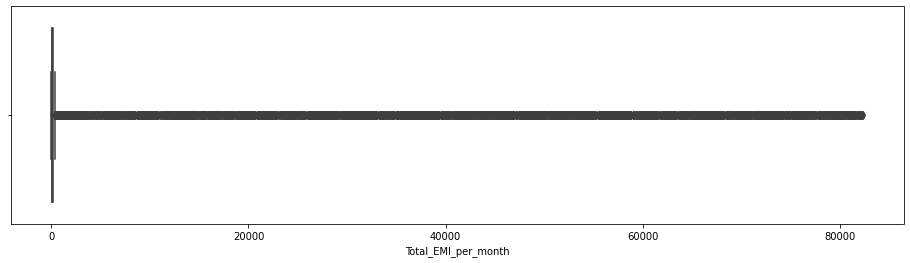

In [219]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Total_EMI_per_month'])

<AxesSubplot:xlabel='Total_EMI_per_month'>

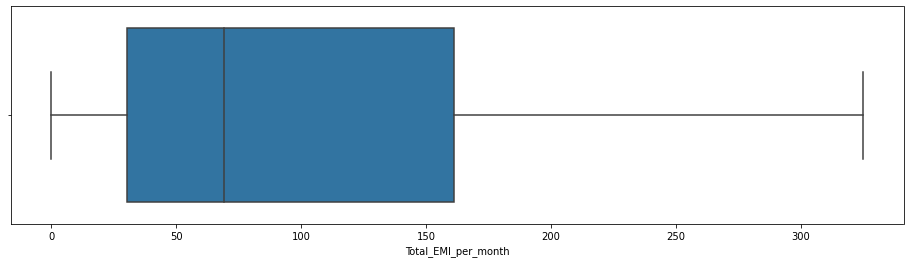

In [220]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Total_EMI_per_month']))

In [221]:
df_train['Total_EMI_per_month'] = iqr_method_outliers(column=df_train['Total_EMI_per_month'])

#### `Amount_invested_monthly` :	_Represents the monthly amount invested by the customer (in USD)_

In [79]:
df_train['Amount_invested_monthly'].replace(to_replace='_',value=np.nan, inplace=True)

In [80]:
df_train['Amount_invested_monthly'] = [float(re.search(r'[0-9]+.[0-9]+',str(x))[0]) if str(x)!='nan' 
                                       else np.nan for x in df_train['Amount_invested_monthly']]

In [81]:
df_train['Amount_invested_monthly'].describe()

count    95521.000000
mean       637.412998
std       2043.319327
min          0.000000
25%         74.534002
50%        135.925682
75%        265.731733
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [82]:
# Fill null value by median
df_train['Amount_invested_monthly'].fillna(value=df_train['Amount_invested_monthly'].median(), inplace=True)

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount_invested_monthly'>

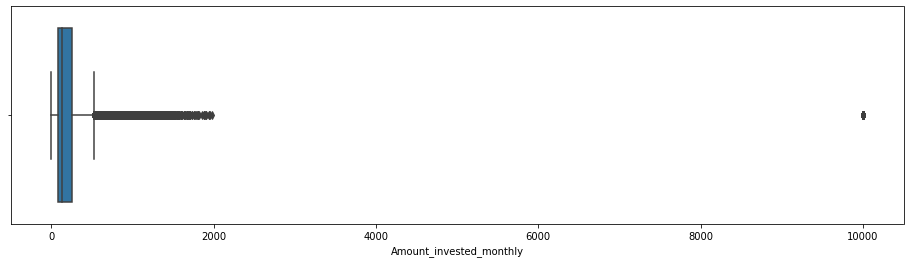

In [83]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train['Amount_invested_monthly'])

<AxesSubplot:xlabel='Amount_invested_monthly'>

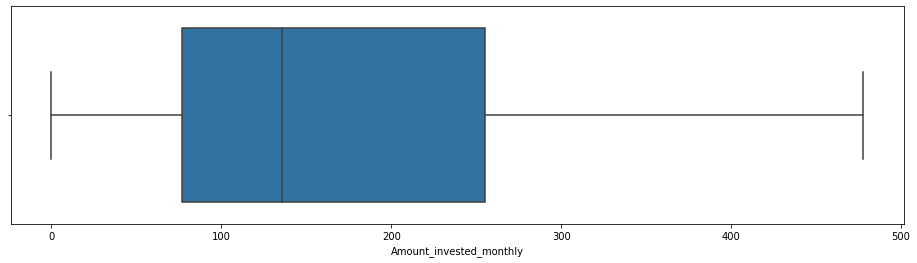

In [222]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Amount_invested_monthly']))

In [223]:
df_train['Amount_invested_monthly'] = iqr_method_outliers(column=df_train['Amount_invested_monthly'])

#### `Payment_Behavior` :	_Represents the payment behavior of the customer (in USD)_

In [84]:
df_train['Payment_Behaviour'].nunique()

7

In [88]:
df_train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

#### `Monthly_Balance` :	_Represents the monthly balance amount of the customer (in USD)_

In [86]:
df_train['Monthly_Balance'] = [float(re.search(r'[0-9]+.[0-9]+',str(x))[0]) if str(x)!='nan' 
                               else np.nan for x in df_train['Monthly_Balance']]

In [87]:
df_train['Monthly_Balance'].describe()

count    9.880000e+04
mean     3.036437e+22
std      3.181295e+24
min      7.759665e-03
25%      2.701145e+02
50%      3.367423e+02
75%      4.703321e+02
max      3.333333e+26
Name: Monthly_Balance, dtype: float64

In [89]:
# Fill null value by mean value
df_train['Monthly_Balance'].fillna(value=df_train['Monthly_Balance'].median(), inplace=True)

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Balance'>

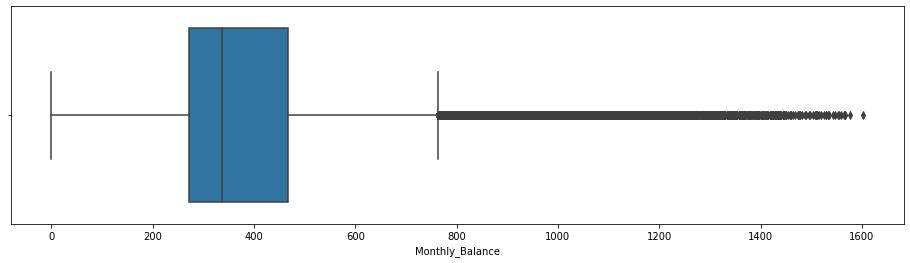

In [90]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_train[df_train['Monthly_Balance']<df_train['Monthly_Balance'].max()]['Monthly_Balance'])

<AxesSubplot:xlabel='Monthly_Balance'>

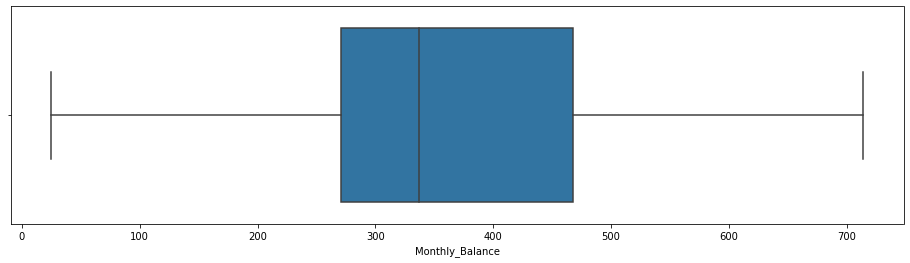

In [225]:
# Check outliners of number of accounts
plt.figure(figsize=(16, 4))
sns.boxplot(x=iqr_method_outliers(column=df_train['Monthly_Balance']))

In [226]:
df_train['Monthly_Balance'] = iqr_method_outliers(column=df_train['Monthly_Balance'])

#### `Credit_Score` :	_Represents the bracket of credit score (Poor, Standard, Good)_

In [227]:
df_train['Credit_Score'].nunique()

3

In [228]:
df_train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

### Data Visualization...

In [229]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [230]:
total_col = [None, 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 
             'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
             'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
             'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
             'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 
             'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']

In [231]:
from ipywidgets import interact

@interact
def plot_selected(plot = [None, sns.countplot, sns.barplot, sns.boxplot, sns.barplot, sns.lineplot, sns.histplot,
                          sns.scatterplot, sns.regplot, sns.pairplot, sns.violinplot, sns.distplot, sns.kdeplot,
                          sns.jointplot, sns.swarmplot, sns.stripplot],
                  width=(5,25,1), heigh=(5,25,1), rotation=(0,90,5), x_=total_col, y_=total_col, hue_=total_col):
    plt.figure(figsize=(width, heigh)) if plot else None
    if x_ and y_ and hue_:
        plot(x=df_train[x_], y=df_train[y_], hue=df_train[hue_]) if plot else None
        display(df_train[[x_, y_, hue_]])
    elif x_ and y_:
        plot(x=df_train[x_], y=df_train[y_]) if plot else None
        display(df_train[[x_, y_]])
    elif x_ and hue_:
        plot(x=df_train[x_], hue=df_train[hue_]) if plot else None
        display(df_train[[x_,hue_]])
    elif y_ and hue_:
        plot(y=df_train[y_], hue=df_train[hue_]) if plot else None
        display(df_train[[y_, hue_]])
    elif x_:
        plot(x=df_train[x_]) if plot else None
        display(df_train[[x_]])
    elif y_:
        plot(y=df_train[y_]) if plot else None
        display(df_train[[y_]])
    elif hue_:
        display(df_train[[hue_]])
    plt.xticks(rotation=rotation) if plot else None
    return

interactive(children=(Dropdown(description='plot', options=(None, <function countplot at 0x00000156F1D314C0>, …

## ML

In [246]:
df_train.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [247]:
df_train.to_csv('updated_train_data.csv', index=False)

#### Drop columns which not use full for ML.

In [248]:
df_temp = pd.read_csv('updated_train_data.csv')

In [249]:
# ID --> Because it is unique indentification of each entry, so it is not use for ML
# Name --> Because it is related to Customer_ID  therefor no need for this name
# SSN --> it is directly represents Customer_ID..

df_temp.drop(columns=['ID', 'Name', 'SSN'], inplace=True)

#### Convert object data into Numerical Format using `LabelEncoder`

In [250]:
df_temp

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,219.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,_,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4.0,6.0,35.0,2.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [251]:
from sklearn.preprocessing import LabelEncoder

def fit_and_trasfer_into_Labelencoder(dataframe):
    data = dataframe.copy()
    obj_cols = data.select_dtypes('object').columns
    obj_cols_fit = {}
    for col in obj_cols:
        obj_cols_fit[col] = LabelEncoder().fit(data[col])
    for col, labeled in obj_cols_fit.items():
        data[col] = labeled.fit_transform(data[col])
    return obj_cols_fit, data

def trasfer_into_Labelencoder(labeled_dict, new_data):
    data = new_data.copy()
    for col, lable in labeled_dict.items():
        if col in data.columns:
            data[col] = lable.fit_transform(data[col])
    return data

In [252]:
labeled_dict, df_temp = fit_and_trasfer_into_Labelencoder(df_temp)

In [253]:
labeled_dict

{'Customer_ID': LabelEncoder(),
 'Month': LabelEncoder(),
 'Age': LabelEncoder(),
 'Occupation': LabelEncoder(),
 'Type_of_Loan': LabelEncoder(),
 'Credit_Mix': LabelEncoder(),
 'Payment_of_Min_Amount': LabelEncoder(),
 'Payment_Behaviour': LabelEncoder(),
 'Credit_Score': LabelEncoder()}

In [254]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int32  
 1   Month                     100000 non-null  int32  
 2   Age                       100000 non-null  int32  
 3   Occupation                100000 non-null  int32  
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  int32  
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

<AxesSubplot:>

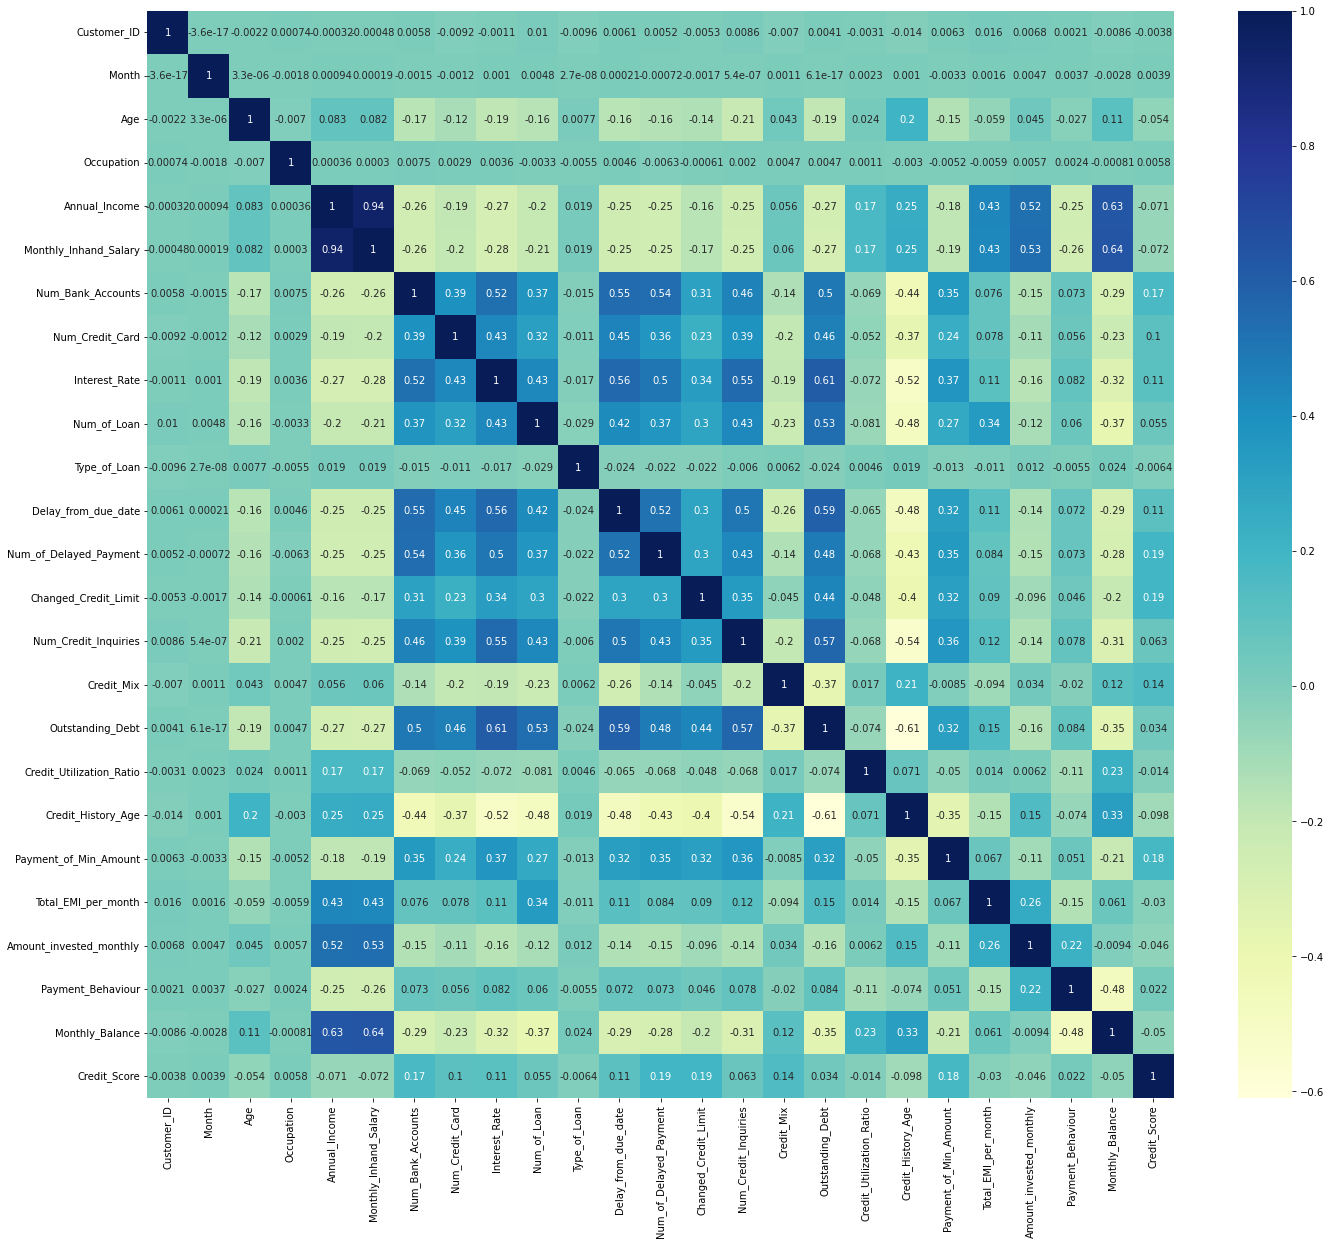

In [255]:
plt.figure(figsize=(23, 20))
sns.heatmap(df_temp.corr(), annot=True, cmap='YlGnBu')

#### Split data into Features(`X`) and Target(`Y`) Columns

> In this data set our Target Column is `Credit_Score`.

In [256]:
x = df_temp.drop(columns=['Credit_Score'])
y = df_temp['Credit_Score']

x.shape, y.shape

((100000, 24), (100000,))

#### Split into training and testing dataset

In [257]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.01, random_state=65)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((99000, 24), (1000, 24), (99000,), (1000,))

#### Run model check accuracy of each model...

> In this dataset we  have to predict categorical data... so, we run Classification models....

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [259]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'XGBClassifier':XGBClassifier(),
          'CatBoostClassifier':CatBoostClassifier(verbose=False)}
accuracy = {}
for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)
    # Check accuracy and save
    score = '{:.3f}'.format(model.score(x_test, y_test) * 100)
    accuracy[name] = float(score)

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [260]:
accuracy

{'LogisticRegression': 57.6,
 'RandomForestClassifier': 80.6,
 'GradientBoostingClassifier': 70.9,
 'KNeighborsClassifier': 81.0,
 'XGBClassifier': 77.8,
 'CatBoostClassifier': 76.4}

> As per accuracy of all models it is clear that `RandomForestClassifier` model has max score as compare to other.

#### Hyper Tunning models:

In [163]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

##### `KNeighborsClassifier`

In [261]:
score = {}
for i in range(1, 26):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score[i] = model.score(x_test, y_test)
score

{1: 0.755,
 2: 0.779,
 3: 0.792,
 4: 0.804,
 5: 0.81,
 6: 0.814,
 7: 0.815,
 8: 0.808,
 9: 0.796,
 10: 0.8,
 11: 0.783,
 12: 0.763,
 13: 0.731,
 14: 0.702,
 15: 0.681,
 16: 0.668,
 17: 0.678,
 18: 0.671,
 19: 0.674,
 20: 0.672,
 21: 0.685,
 22: 0.675,
 23: 0.674,
 24: 0.666,
 25: 0.668}

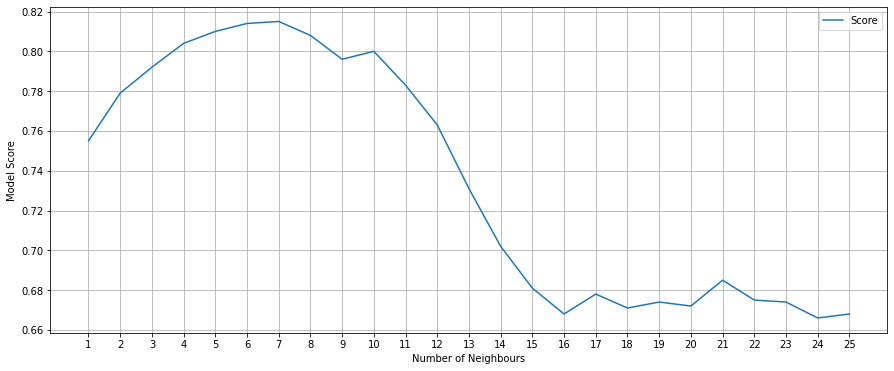

In [262]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=pd.DataFrame(score, index=['Score']).T)
plt.xticks([i for i in range(1, 26)]);
plt.grid();
plt.xlabel('Number of Neighbours')
plt.ylabel('Model Score');

In [263]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.815

##### `RandomForestClassifier`

In [39]:
rfc_model = RandomForestClassifier(random_state=65)
rfc_model.fit(x_train, y_train)
rfc_model.score(x_test, y_test)

0.804

In [158]:
from sklearn.model_selection import RandomizedSearchCV

param_dict = {'n_estimators': np.arange(10, 1000, 50),
              'max_depth': [None, 3, 5, 10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2)}

np.random.seed(65)

rfc_rc_model = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions=param_dict,
                                  cv=5, 
                                  n_iter=20,
                                  verbose=True)

rfc_rc_model.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [159]:
rfc_rc_model.best_params_

{'n_estimators': 910,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [162]:
rfc_rc_model.score(x_test, y_test)

0.792

In [29]:
rfc_model = RandomForestClassifier(n_estimators=910, min_samples_split=14,
                                   min_samples_leaf=1, max_depth=None)
rfc_model.fit(x_train, y_train)
rfc_model.score(x_test, y_test)

0.791

In [131]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
rfc_model.score(x_test, y_test)

0.805

Text(0.5, 6.0, 'True Label')

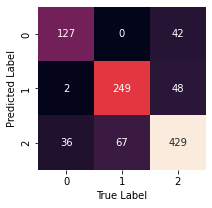

In [161]:
y_pred = rfc_model.predict(x_test)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt='.0f')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       169
           1       0.79      0.83      0.81       299
           2       0.83      0.81      0.82       532

    accuracy                           0.81      1000
   macro avg       0.79      0.80      0.80      1000
weighted avg       0.81      0.81      0.80      1000



##### `GradientBoostingClassifier`

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dict = {'n_estimators': np.arange(10, 1000, 50),
              'max_depth': [None, 3, 5, 10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2)}

np.random.seed(65)

gbc_rs_model = RandomizedSearchCV(GradientBoostingClassifier(),
                                  param_distributions=param_dict,
                                  cv=5, 
                                  n_iter=10,
                                  verbose=True)

gbc_rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
gbc_rs_model.best_params_

In [ ]:
gbc_rs_model.score(x_test, y_test)

##### `XGBClassifier`

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

param_dict = {'n_estimators': np.arange(100, 1050, 100),
              'max_depth': np.arange(2, 18, 1),
              'learning_rate': [0.1, 0.01],
              'gamma':np.arange(1, 9),
              'reg_alpha': np.arange(40, 180, 1),
              'reg_lambda': [0,1],
              'colsample_bytree':[0.5,1],
              'min_child_weight':np.arange(0, 10, 1)}

np.random.seed(65)

xgb_rs_model = RandomizedSearchCV(XGBClassifier(),
                                  param_distributions=param_dict,
                                  cv=5, 
                                  n_iter=10,
                                  verbose=True)

tqdm(xgb_rs_model.fit(x_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0it [2:39:00, ?it/s]
0it [00:00, ?it/s]

In [157]:
xgb_rs_model.best_params_
# 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400

{'reg_lambda': 1,
 'reg_alpha': 78,
 'n_estimators': 400,
 'min_child_weight': 0,
 'max_depth': 16,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 1}

In [158]:
xgb_rs_model.score(x_test, y_test)

0.718

In [159]:
temp_xgb = XGBClassifier(reg_lambda=1, reg_alpha=78, n_estimators=400, min_child_weight=0, max_depth=16, 
                         learning_rate=0.1, gamma=2, colsample_bytree=1)
temp_xgb.fit(x_train, y_train)
temp_xgb.score(x_test, y_test)

0.718

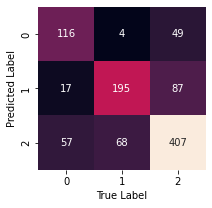

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       169
           1       0.73      0.65      0.69       299
           2       0.75      0.77      0.76       532

    accuracy                           0.72      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.72      0.72      0.72      1000



In [160]:
y_pred = temp_xgb.predict(x_test)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt='.0f')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.show()
print(classification_report(y_test, y_pred))

In [264]:
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=400)
xgb_model.fit(x_train, y_train)
xgb_model.score(x_test, y_test)

0.821

Text(0.5, 6.0, 'True Label')

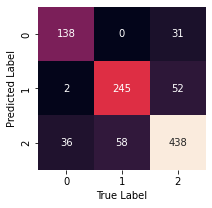

In [265]:
y_pred = xgb_model.predict(x_test)
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt='.0f')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       169
           1       0.81      0.82      0.81       299
           2       0.84      0.82      0.83       532

    accuracy                           0.82      1000
   macro avg       0.81      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



#### Preparation for test data...

In [118]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [119]:
df_test.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [120]:
df_test['Annual_Income'] = [re.search(r'\d+.\d+', x)[0] for x in df_test['Annual_Income']]
df_test['Annual_Income'] = df_test['Annual_Income'].astype('float64')

# fill null value by 'ffill' method (it is fill by last valid observation forward to next valid)
df_test['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)

df_test['Num_of_Loan'] = [int(re.search(r'-\d*|\d*', x)[0]) for x in df_test['Num_of_Loan']]

# If someone no take loan then 'Num of loan' will be '0' or less than '0' so I fill `Type of Loan` as a "NO_LOAN"
for index in df_test[(df_test['Num_of_Loan']<=0)&(df_test['Type_of_Loan'].isna())]['Type_of_Loan'].index:
    df_test.loc[index, 'Type_of_Loan'] = 'No_Loan'
# Then fill other null value in `Type of Loan` by 'Not Specified'
df_test['Type_of_Loan'].fillna(value='Not Specified', inplace=True)

df_test['Num_of_Delayed_Payment'] = [int(re.search(r'-\d*|\d*', str(x))[0]) if str(x)!='nan' 
                                      else np.nan for x in df_test['Num_of_Delayed_Payment']]
# if some one dot delayed their payment so according `Delay from due date` is 0 or negative day
# therefore fill this column by '0'.
for index in df_test[(df_test['Delay_from_due_date']<=0)&
                      (df_test['Num_of_Delayed_Payment'].isna())]['Num_of_Delayed_Payment'].index:
    df_test.loc[index, 'Num_of_Delayed_Payment'] = 0
# rest of the value fill by median value
df_test['Num_of_Delayed_Payment'].fillna(value=df_test['Num_of_Delayed_Payment'].median(), inplace=True)

df_test['Changed_Credit_Limit'].replace('_', np.nan, inplace=True)
df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].astype(float)
# fill null value in this column by mean value
df_test['Changed_Credit_Limit'].fillna(value=df_test['Changed_Credit_Limit'].median(), inplace=True)

# Fill this column by median value
df_test['Num_Credit_Inquiries'].fillna(value=df_test['Num_Credit_Inquiries'].median(), inplace=True)

df_test['Outstanding_Debt'] = [float(re.search(r'\d*.\d*', str(x))[0]) for x in df_test['Outstanding_Debt']]

df_test['Credit_History_Age'] = [(int(re.findall(r'[0-9]+', str(x))[0])*12)+int(re.findall(r'[0-9]+', str(x))[1]) 
                                  if str(x)!='nan' else np.nan for x in df_test['Credit_History_Age']]
# Fill null value by mean
df_test['Credit_History_Age'].fillna(value=df_test['Credit_History_Age'].median(), inplace=True)

df_test['Amount_invested_monthly'].replace(to_replace='_',value=np.nan, inplace=True)
df_test['Amount_invested_monthly'] = [float(re.search(r'[0-9]+.[0-9]+',str(x))[0]) if str(x)!='nan' 
                                       else np.nan for x in df_test['Amount_invested_monthly']]
# Fill null value by median
df_test['Amount_invested_monthly'].fillna(value=df_test['Amount_invested_monthly'].median(), inplace=True)

df_test['Monthly_Balance'] = [float(re.search(r'[0-9]+.[0-9]+',str(x))[0]) if str(x)!='nan' 
                               else np.nan for x in df_test['Monthly_Balance']]
# Fill null value by median value
df_test['Monthly_Balance'].fillna(value=df_test['Monthly_Balance'].median(), inplace=True)

In [121]:
df_test_ = df_test.copy()

df_test_.drop(columns=['ID', 'Name', 'SSN'], inplace=True)

df_test_ = trasfer_into_Labelencoder(labeled_dict, df_test_)

df_test_

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,12320,3,156,12,19114.12,1824.843333,3,4,3,4,...,2022.0,1,809.98,35.030402,273.0,1,49.574949,236.642682,6,186.266702
1,12320,2,171,12,19114.12,1824.843333,3,4,3,4,...,4.0,1,809.98,33.053114,274.0,1,49.574949,21.465380,2,361.444004
2,12320,1,171,12,19114.12,1824.843333,3,4,3,4,...,4.0,1,809.98,33.811894,225.0,1,49.574949,148.233938,5,264.675446
3,12320,0,183,12,19114.12,1824.843333,3,4,3,4,...,4.0,1,809.98,32.430559,276.0,1,49.574949,39.082511,2,343.826873
4,1066,3,225,15,34847.84,3037.986667,2,4,6,1,...,5.0,1,605.03,25.926822,327.0,1,18.816215,39.684018,1,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7857,0,523,1,20002.88,1929.906667,10,8,29,5,...,12.0,3,3571.70,34.780553,225.0,2,60.964772,146.486325,6,275.539570
49996,8833,3,184,9,39628.99,1929.906667,4,6,7,2,...,7.0,1,502.38,27.758522,383.0,0,35.104023,181.442999,6,409.394562
49997,8833,2,184,9,39628.99,3359.415833,4,6,7,2,...,7.0,1,502.38,36.858542,384.0,1,35.104023,10000.000000,4,349.726332
49998,8833,1,184,9,39628.99,3359.415833,4,6,7,2,...,7.0,1,502.38,39.139840,385.0,1,35.104023,97.598580,3,463.238981


In [137]:
y_pred_ = rfc_model.predict(df_test_)
submission_ = df_test[['ID']]
submission_['Credit_Score'] = labeled_dict['Credit_Score'].inverse_transform(y_pred_)
submission_.to_csv('Submission.csv', index=False)

C:\Users\home_\AppData\Local\Temp/ipykernel_1480/2364621126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_['Credit_Score'] = labeled_dict['Credit_Score'].inverse_transform(y_pred_)


In [138]:
submission_

,ID,Credit_Score
0,0x160a,Good
1,0x160b,Good
2,0x160c,Good
3,0x160d,Good
4,0x1616,Good
...,...,...
49995,0x25fe5,Standard
49996,0x25fee,Standard
49997,0x25fef,Poor
49998,0x25ff0,Poor


In [147]:
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=400)
xgb_model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [148]:
y_pred_ = xgb_model.predict(df_test_)
submission_ = df_test[['ID']]
submission_['Credit_Score'] = labeled_dict['Credit_Score'].inverse_transform(y_pred_)
submission_.to_csv('Submission.csv', index=False)

C:\Users\home_\AppData\Local\Temp/ipykernel_1480/468884378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_['Credit_Score'] = labeled_dict['Credit_Score'].inverse_transform(y_pred_)


In [149]:
submission_

,ID,Credit_Score
0,0x160a,Good
1,0x160b,Good
2,0x160c,Good
3,0x160d,Good
4,0x1616,Good
...,...,...
49995,0x25fe5,Standard
49996,0x25fee,Poor
49997,0x25fef,Poor
49998,0x25ff0,Poor
